# Credit Card Fraud Detection
### Saeed Nusri

## Introduction

This notebook presents the methodology created to deal with credit card fraud detection. The dataset used also stands as an example of unbalaced data, or skewed data, where the class of interest occurs at a significantly lower rate.


This notebook will test different methods on skewed data. The idea is to compare if preprocessing techniques work better when there is an overwhelming majority class that can disrupt the efficiency of our predictive model.

You will also be able to see how to apply cross validation for hyperparameter tuning on different classification models. Predictive models are built using:

- SVMs
- Logistic Regression



## Analysis

The data was first acquired from [here](https://www.kaggle.com/dalpozz/creditcardfraud/data) and loaded using pandad library. Prelimnary analysis showed that the dateset only contains numerical values which, most likely, were a result of PCA.

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import svm

%matplotlib inline

/Users/Nusri/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dat = pd.read_csv("creditcard.csv")

dat.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
dat.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
count = dat.groupby(["Class"])["Time"].count()
count

Class
0    284315
1       492
Name: Time, dtype: int64

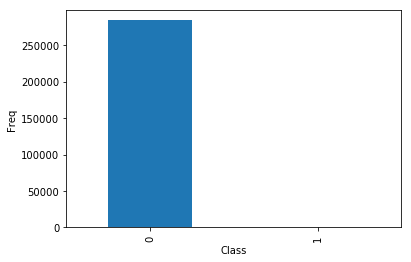

In [5]:
count.plot.bar()
plt.xlabel("Class")
plt.ylabel("Freq")
plt.title("Class Histogram")

In [49]:
class1 = dat.loc[dat["Class"] == 1]
class1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normalizedAmt
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,-0.353229
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,1.761758
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,0.606031
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,-0.117342
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,-0.349231
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1,-0.349231
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1,-0.349231
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1,-0.349231
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1,-0.349231
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1,-0.349231


Histogram of the count variable shows that the data is severely unbalanced.

To overcome the problem of the skewed data, the dataset can be resampled. Essentially this is a method that will process the data to have an approximate 50-50 ratio:
- The data can oversampled, which is adding copies of the under-represented class 
- Or undersamples, which deletes instances from the over-represented class

In this case undersampling makes sense because we have a good amount of data.

Also the following methodologes can be used to assess accuracy of the detection model:

- Use the confusion matrix to calculate Precision, Recall
- ROC curves - calculates sensitivity/specificity ratio

## Feature Engineering

The dataset contains 30 features. These include 28 anonamised  variables result of PCA, time and amount. The time field can be dropped from the dataset and amount field can be normalized.

Then classifications models SVM and logistic regression will be used and the accurancy of the model will be assessed using AUROC.

In [31]:
from sklearn.preprocessing import StandardScaler

# Normalizing amount variable and dropping Time variable
dat["normalizedAmt"] = StandardScaler().fit_transform(dat["Amount"].reshape(-1,1))
dat_norm = dat.drop(["Amount", "Time"], axis = 1)
dat_norm.head()

/Users/Nusri/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmt
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [32]:
x = dat.loc[dat["Class"] == 1]
y = dat.loc[dat["Class"] == 0]
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normalizedAmt
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,-0.353229
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,1.761758
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,0.606031
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,-0.117342
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,-0.349231


In [9]:
fraud_count = len(dat[dat.Class == 1])
fraud_count

492

The following shows the undersampling done on the majority class before the model is created.

In [10]:
fraud_index = np.array(dat[dat.Class == 1].index)
secure_index = np.array(dat[dat.Class != 1].index)


#Random selection of the same number of minority class from the majority class data
random_secure_index = np.random.choice(secure_index, fraud_count, replace = False)
len(random_secure_index)

492

In [11]:
selected_record_index = np.concatenate([random_secure_index, fraud_index])

In [12]:
selected_records = dat.loc[selected_record_index,:]

In [52]:
x_dat = dat.ix[:, dat.columns != 'Class']
y_dat = dat.ix[:, dat.columns == 'Class']

x_undersample = selected_records.ix[:, selected_records.columns != 'Class']
y_undersample = selected_records.ix[:, selected_records.columns == 'Class']


f_sel = selected_records[selected_records.Class == 1]
s_sel = selected_records[selected_records.Class == 0]

f_sel_len = len(selected_records[selected_records.Class == 1])
s_sel_len = len(selected_records[selected_records.Class == 0])


print"Percentage of secure transaction: " + str(s_sel_len*100/len(selected_records)) + "%"

print"Percentage of fradulent transactions: ", str(f_sel_len*100/len(selected_records)) + "%"

print"Total Records: ", str(len(selected_records))

Percentage of secure transaction: 50%
Percentage of fradulent transactions:  50%
Total Records:  984


## Training Models 

The training and testing data are split for both, the original dataset and the undersampled data. To test the models recall metric will be measured.

Measuring recall comes with a caveat that trying to increase this metric, tends to come with a decrease of precision. However, in the case of credit card fruad detection, if we predict that a transaction is fraudulent and turns out not to be it is not a serious issue as compared to the opposite.

In [53]:

x_train, x_test, y_train, y_test = train_test_split(x_dat
                                                    , y_dat, train_size = 0.7, random_state = 0)


x_train_sel, x_test_sel, y_train_sel, y_test_sel = train_test_split(x_undersample,y_undersample, 
                                                                    train_size = 0.7, 
                                                                    random_state = 0)


In [54]:
print("")
print("Number transactions train dataset: ", len(x_train_sel))
print("Number transactions test dataset: ", len(x_test_sel))
print("Total number of transactions: ", len(x_train_sel)+len(x_test_sel))


('Number transactions train dataset: ', 688)
('Number transactions test dataset: ', 296)
('Total number of transactions: ', 984)


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report

In [ ]:
##Best C for SVC


def printing_Kfold_scores_sv(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:

        print(c_param)
    

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            sv = svm.SVC(kernal = 'linear', C = c_param)

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            sv.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = sv.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    
    print('Best C parameter = ', best_c)
    
    
    return best_c


In [ ]:
best_c_sv = printing_Kfold_scores_sv(x_train_sel,y_train_sel)

The best C parameter is found through K fold scores ad hoc function.

In [98]:
#This is a generic function for finding the best C parameter for Logistic Regression. 
#The tested C parameters are from range 0.01 to 100

def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 

    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:

        print(c_param)
    

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    
    print('Best C parameter = ', best_c)
    
    
    return best_c

In [91]:
best_c = printing_Kfold_scores(x_train_sel,y_train_sel)

0.01
('Iteration ', 1, ': recall score = ', 0.90769230769230769)
('Iteration ', 2, ': recall score = ', 0.83076923076923082)
('Iteration ', 3, ': recall score = ', 0.810126582278481)
('Iteration ', 4, ': recall score = ', 0.92063492063492058)
('Iteration ', 5, ': recall score = ', 0.87323943661971826)

('Mean recall score ', 0.86849249559893171)

0.1
('Iteration ', 1, ': recall score = ', 0.92307692307692313)
('Iteration ', 2, ': recall score = ', 0.93846153846153846)
('Iteration ', 3, ': recall score = ', 0.83544303797468356)
('Iteration ', 4, ': recall score = ', 0.93650793650793651)
('Iteration ', 5, ': recall score = ', 0.88732394366197187)

('Mean recall score ', 0.9041626759366107)

1
('Iteration ', 1, ': recall score = ', 0.92307692307692313)
('Iteration ', 2, ': recall score = ', 0.87692307692307692)
('Iteration ', 3, ': recall score = ', 0.82278481012658233)
('Iteration ', 4, ': recall score = ', 0.93650793650793651)
('Iteration ', 5, ': recall score = ', 0.94366197183098588)


A general function is written to plot confusion matrix. 

In [100]:
import itertools

#Function for plotting a confusion matrix.
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True cases')
    plt.xlabel('Predicted cases')

### Support Vector Machines

In [ ]:
sv = svm.SVC(kernel = "poly", C=1.0).fit(x_train_sel,y_train_sel)

print "Recall metric for SVM model: " + str((recall_score(y_train_sel, sv.predict(x_train_sel)))*100) + "%"

70.7482993197


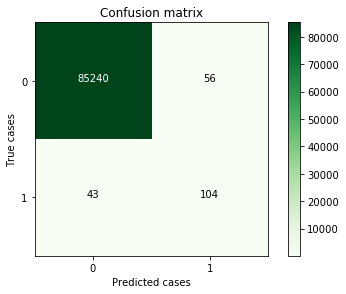

In [116]:
y_pred_undersample = sv.predict(x_test_sel.values)

y_pred_sv = sv.predict(x_test.values)



# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_sv)
np.set_printoptions(precision=2)

print str((recall_score(y_test, sv.predict(x_test)))*100)

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()



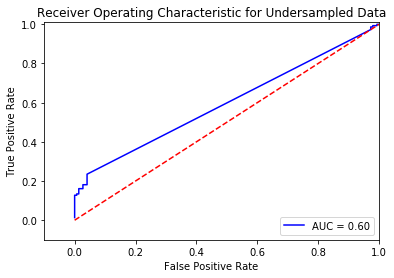

In [117]:
y_pred_undersample_score_sv = sv.fit(x_train_sel,
                                  y_train_sel.values.ravel()).decision_function(x_test_sel.values)


fpr, tpr, thresholds = roc_curve(y_test_sel.values.ravel(),y_pred_undersample_score_sv)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic for Undersampled Data')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [118]:
y_pred_score_sv = sv.fit(x_train,
                                  y_train.values.ravel()).decision_function(x_test.values)


fpr_sv, tpr_sv, thresholds_sv = roc_curve(y_test.values.ravel(),y_pred_score_sv)
roc_auc_sv = auc(fpr_sv,tpr_sv)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_sv, tpr_sv, 'b',label='AUC = %0.2f'% roc_auc_sv)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

KeyboardInterrupt: 

77% recall and 0.76 AUC denotes not a strong prediction model. However, we will be comparing this to the logistic regression model. 

### Logistic Regression

93.2944606414%


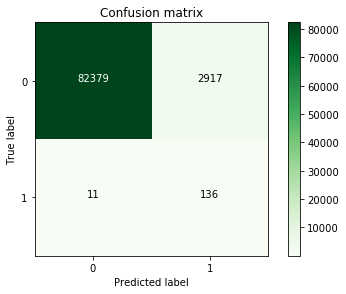

In [94]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(x_train_sel,y_train_sel.values.ravel())
y_pred = lr.predict(x_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print str((recall_score(y_train, lr.predict(x_train)))*100) + "%"

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

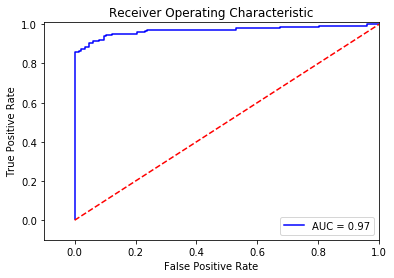

In [95]:
# ROC CURVE
lr = LogisticRegression(C = best_c, penalty = 'l1')
y_pred_undersample_score = lr.fit(x_train_sel,
                                  y_train_sel.values.ravel()).decision_function(x_test_sel.values)

fpr, tpr, thresholds = roc_curve(y_test_sel.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

It seems like the logistic regression model is better in predicting credit card fraud wtih 93.3% recall and AUROC of 0.97. 

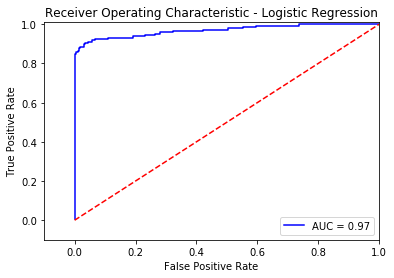

In [110]:
y_predict_score_lr = lr.fit(x_train,
                            y_train.values.ravel()).decision_function(x_test.values)

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test.values.ravel(), y_predict_score_lr)

roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(fpr_lr, tpr_lr, 'b',label='AUC = %0.2f'% roc_auc_lr)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()